In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features_train.csv", delimiter=",")
print(df.shape)
df.head()

(10000, 121)


,Id,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,119
0,0,2.311705,0.445665,7.020637,1.582505,3.010977,1.375501,29.897623,2.886738,-8.641869,...,0.642797,0.706869,0.997519,1.270321,0.109460,2.829606,-8.292344,1.423754,0.090224,2.006436
1,1,0.580430,0.200428,22.176950,0.479475,0.173418,0.106690,-28.162402,5.388960,-9.188298,...,1.966491,0.330869,0.449754,0.257662,-1.131653,-0.908362,20.468617,1.146844,0.142068,0.373541
2,2,0.042687,0.641976,1.663984,0.998398,1.262488,0.784453,-22.016388,1.512673,-3.526049,...,0.897811,0.610529,0.158270,5.695307,0.358590,-8.164399,0.596139,0.522287,0.832107,4.264087
3,3,0.060388,1.408700,92.827212,2.691115,0.645211,0.710104,12.132919,1.606096,-0.782570,...,1.375550,0.708163,0.537862,1.357389,-1.659754,-1.105801,-6.426477,0.404628,0.452828,1.106436
4,4,1.045148,0.704313,4.823582,0.546102,0.397827,0.606078,-11.135888,0.639788,-9.182691,...,10.556016,0.225400,0.672425,0.257381,-0.435355,7.744958,10.908781,4.413541,0.782079,0.279165


In [ ]:
df.isnull().sum()

Id     0
0      0
1      0
2      0
3      0
      ..
115    0
116    0
117    0
118    0
119    0
Length: 121, dtype: int64

In [ ]:
df.describe()

,Id,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,119
count,10000.00000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,1.000206e+00,1.653294,1.323895e+01,1.631063,1.004520e+00,1.011949e+00,0.520059,1.657632,-0.002513,...,1.648705,0.497571,0.493227,1.635187,-0.000071,-0.026737,0.013010,1.620603,0.503886,1.667950
std,2886.89568,1.423822e+00,2.278088,1.870323e+01,2.040002,1.409997e+00,1.444751e+00,31.791384,2.116264,10.060025,...,2.188790,0.285955,0.290153,1.975617,0.997596,10.082855,9.968787,2.117979,0.285662,2.203032
min,0.00000,1.282517e-08,0.024358,7.274511e-07,0.020518,3.379589e-11,1.348884e-07,-129.141171,0.019514,-37.427526,...,0.022037,0.000128,0.000217,0.016691,-3.885360,-34.580159,-40.925480,0.016396,0.000139,0.029379
25%,2499.75000,1.040056e-01,0.509503,1.318718e+00,0.512428,1.042731e-01,1.005381e-01,-21.037225,0.507242,-6.698098,...,0.510389,0.252094,0.241741,0.511563,-0.677989,-6.804569,-6.904905,0.504073,0.260493,0.513686
50%,4999.50000,4.602140e-01,0.995946,6.109321e+00,0.994325,4.558152e-01,4.490724e-01,0.351341,0.998968,0.081728,...,0.990977,0.496045,0.488491,0.999822,-0.006377,-0.109698,0.155250,1.002604,0.503294,1.003636
75%,7499.25000,1.295762e+00,1.943914,1.758705e+01,1.933788,1.339252e+00,1.336866e+00,21.714889,1.982386,6.818884,...,1.944777,0.744041,0.747421,1.988738,0.669345,6.765366,6.820834,1.932612,0.748390,1.941041
max,9999.00000,1.601254e+01,72.033830,2.681004e+02,33.933547,1.684319e+01,1.812245e+01,118.399310,37.265489,38.392229,...,36.698799,0.999973,0.999895,26.936000,3.737129,36.371289,34.679957,44.943499,0.999985,45.467996


In [ ]:
df_target = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/target_train.csv", delimiter=",")
print(df_target.shape)
df_target.head()

(10000, 2)


,Id,Expected
0,0,0
1,1,0
2,2,2
3,3,1
4,4,2


In [ ]:
X = df.drop(columns=['Id'])
y = df_target.drop(columns=['Id'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train.shape, X_test.shape

((7000, 120), (3000, 120))

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)



In [ ]:
categorical_transformer = Pipeline(steps=[
                                          ("cat_imputer", SimpleImputer(strategy='constant',
                                                                        fill_value='Not Available').set_output(transform="pandas")),
                                          ("onehot", OneHotEncoder(sparse_output=False,
                                                                   handle_unknown="ignore").set_output(transform="pandas"))
                                          ])
categorical_transformer

Pipeline(steps=[('cat_imputer',
                 SimpleImputer(fill_value='Not Available',
                               strategy='constant')),
                ('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [ ]:
numeric_transformer = Pipeline(steps=[
                                      ("knn_imputer", KNNImputer(n_neighbors=5).set_output(transform="pandas")),
                                      ("scaler", StandardScaler().set_output(transform="pandas"))
                                      ])

numeric_transformer

Pipeline(steps=[('knn_imputer', KNNImputer()), ('scaler', StandardScaler())])

In [ ]:
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()


In [ ]:
preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer,
                                                       numeric_features),
                                               ("cat", categorical_transformer,
                                                       categorical_features)
                                               ]).set_output(transform="pandas")
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('knn_imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['0', '1', '2', '3', '4', '5', '6', '7', '8',
                                  '9', '10', '11', '12', '13', '14', '15', '16',
                                  '17', '18', '19', '20', '21', '22', '23',
                                  '24', '25', '26', '27', '28', '29', ...]),
                                ('cat',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(fill_value='Not '
                                                                           'Available',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 [])])

In [ ]:
pipeline_xgb = Pipeline([("pre_process", preprocessor),
                         ("model", xgb)])
pipeline_xgb

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['0', '1', '2', '3', '4', '5',
                                                   '6', '7', '8', '9', '10',
                                                   '11', '12', '13', '14', '15',
                                                   '16', '17', '18', '19', '20',
                                                   '21', '22', '23', '24', '25',
                                                   '26', '27', '28', '29', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_v...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
pipeline_xgb.fit(X_train, y_train)
y_pred = pipeline_xgb.predict(X_test)

In [ ]:
y_pred[:10]

array([0, 0, 1, 0, 0, 0, 2, 1, 1, 0])

In [ ]:
class_labels = le.classes_

print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

           0       0.56      0.57      0.57      1002
           1       0.60      0.64      0.62       988
           2       0.59      0.54      0.56      1010

    accuracy                           0.58      3000
   macro avg       0.58      0.58      0.58      3000
weighted avg       0.58      0.58      0.58      3000



,0,1,2
0,571,216,215
1,190,633,165
2,256,207,547


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
scores = {}
scores['xgb'] = round(f1_score(y_test, y_pred, average='weighted'), 3)

In [ ]:
feature_names = pipeline_xgb['pre_process'].get_feature_names_out()
feature_names

array(['num__0', 'num__1', 'num__2', 'num__3', 'num__4', 'num__5',
       'num__6', 'num__7', 'num__8', 'num__9', 'num__10', 'num__11',
       'num__12', 'num__13', 'num__14', 'num__15', 'num__16', 'num__17',
       'num__18', 'num__19', 'num__20', 'num__21', 'num__22', 'num__23',
       'num__24', 'num__25', 'num__26', 'num__27', 'num__28', 'num__29',
       'num__30', 'num__31', 'num__32', 'num__33', 'num__34', 'num__35',
       'num__36', 'num__37', 'num__38', 'num__39', 'num__40', 'num__41',
       'num__42', 'num__43', 'num__44', 'num__45', 'num__46', 'num__47',
       'num__48', 'num__49', 'num__50', 'num__51', 'num__52', 'num__53',
       'num__54', 'num__55', 'num__56', 'num__57', 'num__58', 'num__59',
       'num__60', 'num__61', 'num__62', 'num__63', 'num__64', 'num__65',
       'num__66', 'num__67', 'num__68', 'num__69', 'num__70', 'num__71',
       'num__72', 'num__73', 'num__74', 'num__75', 'num__76', 'num__77',
       'num__78', 'num__79', 'num__80', 'num__81', 'num__82',

In [ ]:
xgb_model = pipeline_xgb['model']
xgb_model.feature_importances_

array([0.00669387, 0.00569946, 0.00965024, 0.00749408, 0.00695436,
       0.00759573, 0.01429408, 0.00718642, 0.00737077, 0.00684516,
       0.00704791, 0.02030641, 0.00748649, 0.00731537, 0.00681504,
       0.00659676, 0.00714103, 0.00622886, 0.00654155, 0.00605884,
       0.0164243 , 0.00732042, 0.00729768, 0.00558211, 0.01717281,
       0.00608496, 0.00836183, 0.00636309, 0.00670637, 0.00570194,
       0.00702837, 0.00787558, 0.0079209 , 0.0081369 , 0.01213423,
       0.0065449 , 0.00623614, 0.01723899, 0.00808645, 0.00696768,
       0.00732645, 0.00759509, 0.01791029, 0.00678425, 0.00638555,
       0.00636718, 0.0062329 , 0.00787897, 0.00742532, 0.00625065,
       0.01758316, 0.00673747, 0.00840347, 0.00913613, 0.00753632,
       0.00634185, 0.00802111, 0.00806501, 0.00785799, 0.00603227,
       0.0156111 , 0.01657193, 0.01369996, 0.00975549, 0.00795735,
       0.00659751, 0.00677239, 0.00690744, 0.00621583, 0.00735527,
       0.00726084, 0.00815769, 0.01411129, 0.00676188, 0.01391

In [ ]:
xgb_importances = pd.DataFrame(
    {"feature": feature_names, "importance": np.round(xgb_model.feature_importances_, 3)}
)
xgb_importances = xgb_importances.sort_values("importance", ascending=False).set_index(
    "feature"
)
xgb_importances.head(20)

,importance
feature,
num__98,0.023
num__11,0.020
num__42,0.018
num__50,0.018
num__37,0.017
num__61,0.017
num__24,0.017
num__20,0.016
num__60,0.016


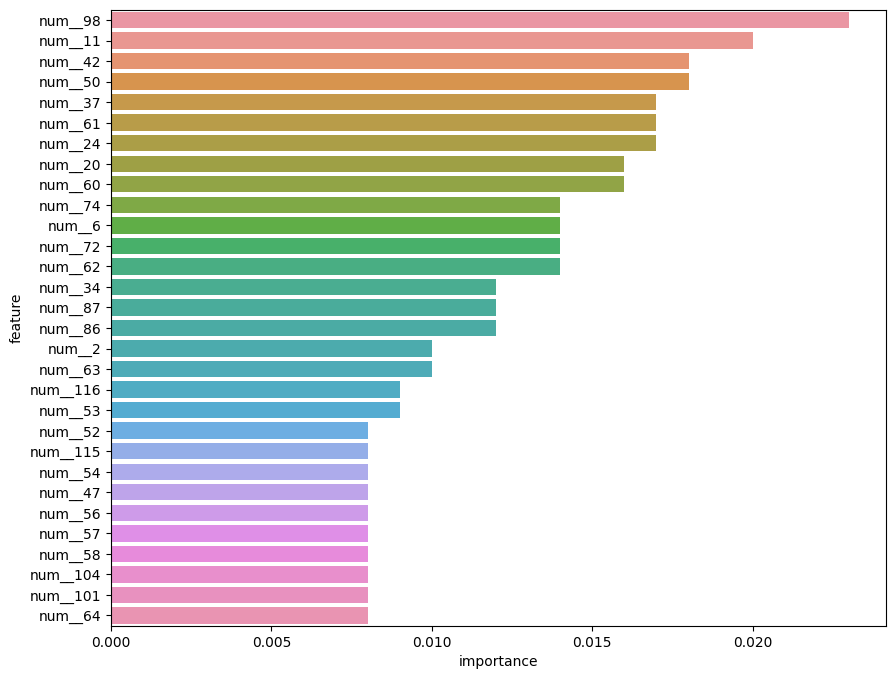

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(y=xgb_importances.head(30).index,
            x=xgb_importances.head(30).importance);

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.2-py2.py3-none-any.whl size=265363806 sha256=7bc439dac41fb37f956305d1e861fd8887d4baa35ad665e97ebd07a63b9b621a
  Stored in directory: /root/.cache/pip/wheels/e9/ea/ab/889709967692e30c57c46137edd2cae6b2768bb65ec7cb8aa5
Successfully built h2o


In [ ]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 944.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=1659dd08dbf58c685f6f14214cfb6b0d643111e5ea4840622032b7f3b5b299f1
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 2.3 MB/s eta 0:00:00


In [ ]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpz71_6q06
  JVM stdout: /tmp/tmpz71_6q06/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpz71_6q06/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_unknownUser_p4l6h8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data = h2o.H2OFrame.from_python(train_data)
train_data['Expected'] = train_data['Expected'].asfactor()
train_data.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,Expected
3.2322,0.310387,0.884207,0.963182,0.00568313,0.0165953,0.921248,0.851902,-10.3809,1.40619,6.2661,-4.87022,1.1393,1.00836,7.80249,-1.9861,1.56904,9.83149e-08,1.88087,-1.52162,2.81344,0.683462,1.30132,1.13907,-1.09934,0.11288,1.81188,0.856636,1.06346,0.955331,14.4728,-1.59272,8.33224,0.330292,0.0520495,-1.04969,3.69727,1.32427,0.666595,1.64596,1.80629,0.144795,-3.57348,0.108348,0.441999,0.308505,14.5603,-4.66884,0.305185,0.879796,9.84294,1.62408,2.22591,3.44651,0.51132,0.441,9.13252,1.66846,-5.77423,-4.2406,77.0518,16.1734,19.3501,36.888,0.666197,1.37185,0.285744,2.8384,2.35776,1.59696,1.50237,4.65623,0.857787,0.289946,4.53435,0.934997,1.58965,6.78042,1.7626,1.33437,0.540136,3.23904,0.710297,0.934821,7.72256,-18.9832,8.25148,0.0148461,0.664362,0.114872,0.626549,0.0880357,1.08469,-1.14181,3.90322,2.37367,0.473249,0.71766,2.02778,3.28838,0.0701445,0.143359,2.99365,0.464223,0.045358,14.7838,0.296982,3.18764,-0.251996,1.32472,0.909469,0.357258,0.489375,1.20095,0.303234,8.12635,20.1126,2.51512,0.62311,3.51539,0
0.0156014,0.879614,10.6463,0.503603,0.633597,0.757074,8.10269,3.43744,-3.442,0.929306,0.549025,-6.63868,3.85831,1.22131,-3.3856,-1.56841,1.44132,0.827622,3.12624,0.503599,-0.847398,0.586516,0.676734,0.636141,0.780134,4.80345,3.34017,0.54291,0.298947,0.0217952,-5.67771,-0.0251768,1.1627,0.585,2.22166,-0.35127,3.42241,0.488667,-0.272672,-1.31672,0.474826,6.39942,0.313218,0.275783,0.00820063,5.51211e-05,-6.89792,1.24357,8.73702e-06,0.0612683,169.705,0.305984,3.52222,4.88251,1.28414,1.28833,-4.16375,0.194303,14.0645,32.5216,31.7793,0.0131178,7.65831,17.4348,3.52181,1.06617,0.514264,1.18951,0.170332,0.0636656,0.404713,0.393328,0.795578,0.353251,23.1347,0.0972066,0.601774,-6.64208,-15.9165,1.54345,0.701955,2.78876,2.99332,2.52909,6.17253,-6.18536,-2.83902,0.619986,0.270287,0.815335,-2.20045,0.8433,5.37421,2.14881,0.235982,0.562579,-0.755036,1.60764,8.93169,0.313156,1.81941,0.000129679,0.48817,0.332317,0.00974589,6.05361,-1.38217,3.95551,0.295967,0.646664,0.285481,0.62129,0.8285,0.682629,0.417354,5.05076,3.82456,0.572781,0.216162,0.497173,0
1.1097,1.38421,2.89611,0.303056,2.01685,0.782548,-18.6257,1.3453,16.1185,1.46119,0.443913,2.29295,-6.73699,0.610625,-3.17726,4.55513,1.56024,4.86089,2.55583,0.476946,-2.48293,0.182485,0.000959146,0.348117,6.60642,0.461285,0.00526973,0.952047,0.713346,0.8565,2.05204,-1.00087,0.323345,3.2216,12.4539,0.562363,-6.93945,5.09774,-0.724527,0.0799963,0.529111,0.207328,-1.06075,1.99557,0.611662,0.050993,1.14191,-2.85721,2.61974,0.781958,224.581,0.879575,0.886661,2.13537,-0.119337,0.308861,-7.58357,1.16526,0.90964,19.5066,148.413,0.266943,0.757097,546.807,5.83216,0.121495,0.262341,2.88902,0.752978,1.30555,0.491375,1.54274,5.13611,1.68058,8.03578,0.71801,2.73963,3.64493,-6.80351,1.40208,0.576866,0.0821962,4.24086,0.573937,0.670842,0.187128,-1.07065,0.0163458,0.409898,0.00908141,-0.727316,0.38265,2.42637,1.57219,0.015556,3.88081,2.03505,0.821249,0.452958,1.9638,1.13869,9.89163,1.83686,0.848143,2.32696,13.6391,1.43184,8.27659,0.620247,0.760991,0.696389,0.354395,0.635475,7.77828,-0.223964,-12.9268,-5.90537,1.36361,0.0758889,2.29293,1
0.00611525,4.00681,13.5352,0.99113,1.09093,0.358615,34.5177,0.366636,-6.3053,3.38198,0.409666,3.74049,8.00407,3.94193,-7.72876,8.59584,0.469912,0.569909,2.67226,1.65511,4.68791,0.0752326,0.885804,0.138139,1.44266,0.883551,2.6569,0.796624,0.49209,0.0264118,-11.402,0.571068,0.401456,0.637161,0.300683,1.93954,-18.3433,2.21805,0.54337,-0.017876,0.0487968,1.00835,-2.33189,0.251714,0.762974,0.0830962,-0.393132,2.91621,3.43364,0.243403,3.47625,1.42852,3.52892,1.28518,0.288601,0.0135921,16.6512,0.341059,8.05423,-8.453

In [ ]:
aml = H2OAutoML(max_models=30, # hard total models experimented limit
                max_runtime_secs=300, # try to run as many models in 5 mins
                max_runtime_secs_per_model=30, # max training time for a model <= 30 s else move to next model
                seed=1)
aml.train(x=X_train.columns.tolist(), y="Expected", training_frame=train_data)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20231218_124734


Model Summary: 
    number_of_trees
--  -----------------
    34

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.038468319698473495
RMSE: 0.1961334232059225
LogLoss: 0.2005059064283422
Mean Per-Class Error: 0.0005701471261164508
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0     1     2     Error        Rate
----  ----  ----  -----------  ---------
2338  1     0     0.000427533  1 / 2,339
1     2305  0     0.000433651  1 / 2,306
0     2     2353  0.000849257  2 / 2,355
2339  2308  2353  0.000571429  4 / 7,000

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.999429
2    1
3    1

ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.362453842347354
RMSE: 0.6020413958751956
LogLoss: 0.9903713523758254
Mean Per-Class Error: 0.4831240898650158
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0     1     2     Error     Rate
----  ----  ----  --------  -------------
1225  510   604   0.476272  1,114 / 2,339
541   1240  525   0.462272  1,066 / 2,306
650   553   1152  0.510828  1,203 / 2,355
2416  2303  2281  0.483286  3,383 / 7,000

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.516714
2    0.823
3    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.516714  0.00783438  0.529286      0.512143      0.519286      0.51          0.512857
auc                      nan       0           nan           nan           nan           nan           nan
err                      0.483286  0.00783438  0.470714      0.487857      0.480714      0.49          0.487143
err_count                676.6     10.9681     659           683           673           686           682
logloss                  0.990371  0.0196672   0.965536      1.018         0.982923      0.999792      0.985605
max_per_class_error      0.51091   0.00732506  0.518681      0.517671      0.501027      0.508475      0.508696
mean_per_class_accuracy  0.517041  0.0078925   0.529555      0.513089      0.51983       0.509824      0.512908
mean_per_class_error     0.482959  0.0078925   0.470445      0.486911      0.48017       0.490176      0.487092
mse                      0.362454  0.00721269  0.352487      0.372429      0.361359      0.364929      0.361066
pr_auc                   nan       0           nan           nan           nan           nan           nan
r2                       0.458904  0.0181548   0.478362      0.429179      0.466076      0.460503      0.460401
rmse                     0.602018  0.00599055  0.593706      0.61027       0.601131      0.604093      0.600888

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_logloss    training_classification_error    training_auc    training_pr_auc
--  -------------------  ----------------  -----------------  ---------------  ------------------  -------------------------------  --------------  -----------------
    2023-12-18 12:49:14  1 min 39.237 se

In [ ]:
xgb_importances.head(5)

,importance
feature,
num__98,0.023
num__11,0.020
num__42,0.018
num__50,0.018
num__37,0.017


In [ ]:
X_feat = df[['98', '11', '42', '50', '37', '61', '24', '20', '60', '74', '6', '72', '62', '34', '87', '86', '2', '63', '116', '53']]
#y_feat = df_target.drop(columns=['Id'])
X_feat

,98,11,42,50,37,61,24,20,60,74,6,72,62,34,87,86,2,63,116,53
0,2.038736,2.280097,-6.725756,0.063419,-3.434408,0.467676,-4.479576,-1.015441,52.903985,5.125120,29.897623,-0.472142,16.306059,23.808472,1.871807,-0.315395,7.020637,11.451140,-8.292344,24.946992
1,0.413158,-5.775092,-2.306467,39.349176,4.490605,0.008065,0.764284,-2.875074,0.103176,0.664921,-28.162402,2.106962,4.646883,5.738793,7.049593,-1.230639,22.176950,1.730066,20.468617,24.299634
2,3.701254,-5.828967,4.533684,0.112884,-3.971667,0.339700,0.950084,4.494041,1.238414,91.770769,-22.016388,-7.420275,94.645030,19.629010,0.136055,6.344787,1.663984,1.253699,0.596139,19.228811
3,5.892810,-4.796236,0.208164,1484.131591,-6.897755,1.581812,-1.805663,2.786869,42.968391,7.526305,12.132919,2.506215,14.622529,25.526839,10.358130,-2.016885,92.827212,13.511534,-6.426477,0.273154
4,2.157437,-6.056380,-3.933762,0.212263,6.709862,0.399809,0.228554,-4.401633,0.022609,1.461310,-11.135888,-4.651395,8.093200,5.240953,60.634258,3.523166,4.823582,187.785616,10.908781,7.047706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.235192,4.839613,-3.003142,0.050491,1.072922,14.563592,4.296560,-8.501861,0.027178,1.807948,32.700597,4.816419,29.071335,0.049944,2.945173,5.083687,30.527258,35.125490,0.167108,0.000076
9996,1.795386,3.184636,-3.387327,30.893745,-0.815517,6.227008,-0.171670,1.190503,0.482241,0.220379,-19.142738,-2.800251,1.280400,2.384680,54.281120,-0.711576,0.645531,26.866840,-0.720931,11.645345
9997,7.920888,-0.693131,5.927829,569.375242,1.611539,0.778189,0.954707,-3.218535,44.915051,22.373765,26.789277,0.312231,0.072010,6.929776,30.222037,-0.140357,2.274211,162.967267,0.548602,26.466692
9998,6.473367,-1.373634,0.244510,1.529663,-0.444970,1.153274,-0.351546,-5.069495,0.002341,0.073039,6.723800,-1.549416,4.073275,36.517062,3.581384,-0.492463,1.990313,104.085499,12.228795,2.340483


In [ ]:
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(X_feat, y, test_size=0.3, random_state=42, stratify=y)
X_train_feat.shape, X_test_feat.shape

((7000, 20), (3000, 20))

In [ ]:
train_data_feat = pd.concat([X_train_feat, y_train_feat], axis=1)
train_data_feat = h2o.H2OFrame.from_python(train_data_feat)
train_data_feat['Expected'] = train_data_feat['Expected'].asfactor()
train_data_feat.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


98,11,42,50,37,61,24,20,60,74,6,72,62,34,87,86,2,63,116,53,Expected
2.02778,-4.87022,-3.57348,9.84294,1.32427,16.1734,-1.09934,2.81344,77.0518,4.53435,0.921248,0.857787,19.3501,0.0520495,0.0148461,8.25148,0.884207,36.888,20.1126,3.44651,0
8.93169,-6.63868,0.313218,169.705,0.488667,0.0131178,0.780134,-0.847398,31.7793,23.1347,8.10269,0.795578,7.65831,2.22166,0.619986,-2.83902,10.6463,17.4348,3.82456,4.88251,0
0.452958,2.29295,-1.06075,224.581,5.09774,0.266943,6.60642,-2.48293,148.413,8.03578,-18.6257,5.13611,0.757097,12.4539,0.0163458,-1.07065,2.89611,546.807,-5.90537,2.13537,1
-3.07811,3.74049,-2.33189,3.47625,2.21805,148.413,1.44266,4.68791,0.0252382,0.153407,34.5177,-0.0775473,63.0841,0.300683,0.0480349,2.52318,13.5352,31.954,-6.89012,1.28518,1
-1.64052,-1.83569,-1.50594,18.9399,-1.36469,0.00339216,1.75101,-1.02852,148.413,413.62,-41.1033,3.37217,13.2854,1.85669,0.382879,0.314933,36.2987,11.3572,8.13038,13.453,2
-0.0772968,6.1133,4.63699,81.6462,-1.09851,148.413,-0.116699,2.96507,0.0190919,0.827892,-25.1006,0.421916,0.750017,7.99678,81.9452,5.40457,3.0708,0.300916,-1.26616,0.872926,2
3.32022,-4.79522,-0.105358,0.0357068,-3.87263,0.146504,1.74719,2.31866,100.235,97.399,-34.0333,2.6069,31.9381,5.14515,7.17221,0.21534,0.0694119,42.1776,13.2565,41.1694,0
-0.388653,0.298108,0.649219,0.710318,-1.06285,0.0160816,0.54399,3.14163,61.573,10.4301,17.0739,-2.98627,23.2167,1.46704,9.40047,-0.402462,1.83362,65.612,-9.1387,0.0247783,2
4.03582,1.64903,-2.75636,0.0623651,-2.60576,0.17547,1.64883,-0.597959,4.17879,17.256,6.823,3.01054,0.929617,0.90772,0.99349,2.56929,62.2259,1.18176,15.7595,0.00812925,0
4.58969,1.59269,6.91537,0.228116,-3.14021,0.089324,1.14861,7.35519,8.32669,2.43706,80.2947,-2.4321,50.5811,11.0428,7.74973,1.11405,64.8513,374.277,5.19195,0.90243,2


In [ ]:
aml_feat = H2OAutoML(max_models=30, # hard total models experimented limit
                max_runtime_secs=300, # try to run as many models in 5 mins
                max_runtime_secs_per_model=30, # max training time for a model <= 30 s else move to next model
                seed=1)
aml_feat.train(x=X_train_feat.columns.tolist(), y="Expected", training_frame=train_data_feat)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_4_20231218_145013


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    104                312                         182935                 8            15           12.3237       29            46            41.6699

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.14794734499546763
RMSE: 0.3846392400619932
LogLoss: 0.46470607277891823
Mean Per-Class Error: 0.10069988811695675
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0     1     2     Error      Rate
----  ----  ----  ---------  -----------
2102  109   128   0.101325   237 / 2,339
107   2079  120   0.0984389  227 / 2,306
137   104   2114  0.102335   241 / 2,355
2346  2292  2362  0.100714   705 / 7,000

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.899286
2    0.987143
3    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.2933984319454144
RMSE: 0.5416626551142458
LogLoss: 0.8106437155968883
Mean Per-Class Error: 0.35982641744708205
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0     1     2     Error     Rate
----  ----  ----  --------  -------------
1508  360   471   0.35528   831 / 2,339
391   1530  385   0.336513  776 / 2,306
509   404   1442  0.387686  913 / 2,355
2408  2294  2298  0.36      2,520 / 7,000

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.64
2    0.890571
3    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.64      0.0156899   0.634286      0.627857      0.643571      0.665714      0.628571
auc                      nan       0           nan           nan           nan           nan           nan
err                      0.36      0.0156899   0.365714      0.372143      0.356429      0.334286      0.371429
err_count                504       21.9659     512           521           499           468           520
logloss                  0.810644  0.0168694   0.816272      0.836873      0.794378      0.798814      0.806882
max_per_class_error      0.388706  0.0287687   0.397802      0.422037      0.373717      0.347458      0.402516
mean_per_class_accuracy  0.640244  0.0154663   0.633929      0.628811      0.644085      0.665565      0.628828
mean_per_class_error     0.359756  0.0154663   0.366071      0.371189      0.355915      0.334435      0.371172
mse                      0.293398  0.00676073  0.295507      0.303617      0.289551      0.285753      0.292564
pr_auc                   nan       0           nan           nan           nan           nan           nan
r2                       0.561967  0.0165435   0.562685      0.534646      0.572175      0.577554      0.562775
rmse                     0.541634  0.00622487  0.543605      0.551015      0.

In [ ]:
# View the AutoML Leaderboard
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb.head(lb.nrows)

model_id,mean_per_class_error,logloss,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_1_AutoML_1_20231218_124734,0.483124,0.990371,0.602041,0.362454,40458,0.052216,XGBoost
GLM_1_AutoML_1_20231218_124734,0.528232,1.0284,0.632494,0.400049,12845,0.006744,GLM


In [ ]:
# View the AutoML Leaderboard
lb = h2o.automl.get_leaderboard(aml_feat, extra_columns = "ALL")
lb.head(lb.nrows)

model_id,mean_per_class_error,logloss,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_1_AutoML_4_20231218_145013,0.359826,0.810644,0.541663,0.293398,8779,0.089508,GBM
GBM_4_AutoML_4_20231218_145013,0.361753,0.805945,0.535332,0.28658,7147,0.073946,GBM
GBM_2_AutoML_4_20231218_145013,0.361974,0.805901,0.538865,0.290376,4358,0.066588,GBM
GBM_3_AutoML_4_20231218_145013,0.362651,0.810998,0.539784,0.291366,5200,0.072491,GBM
XGBoost_2_AutoML_4_20231218_145013,0.364106,0.823747,0.534157,0.285323,5043,0.030866,XGBoost
XGBoost_1_AutoML_4_20231218_145013,0.373853,0.837987,0.540778,0.292441,21671,0.026854,XGBoost
DRF_1_AutoML_4_20231218_145013,0.385849,0.893491,0.582213,0.338971,6815,0.068986,DRF
GLM_1_AutoML_4_20231218_145013,0.512434,1.01457,0.626529,0.392538,1537,0.000638,GLM


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
              precision    recall  f1-score   support

           0       0.64      0.63      0.64      1002
           1       0.68      0.70      0.69       988
           2       0.64      0.63      0.63      1010

    accuracy                           0.65      3000
   macro avg       0.65      0.65      0.65      3000
weighted avg       0.65      0.65      0.65      3000



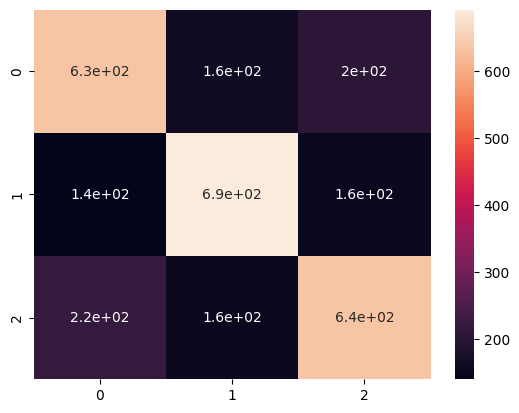

In [ ]:
best_model =  aml_feat.get_best_model(criterion="mean_per_class_error")
X_test_h2o = h2o.H2OFrame.from_python(X_test_feat)
y_pred = best_model.predict(X_test_h2o)
y_pred = y_pred.as_data_frame()['predict'].values
cf = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cf, annot=True);

In [174]:
df_final= pd.DataFrame(y_pred, columns=["Predicted"])
df_final

,Predicted
0,0
1,2
2,1
3,2
4,2
...,...
2995,1
2996,0
2997,2
2998,1


In [177]:
df_final.to_csv('Final.csv', index=False)